<a href="https://colab.research.google.com/github/tashkinovnet/Home-Task/blob/Hometask_6.ipynb/Hometask_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hometask 6**

### Задача 1
Примените алгоритм Metropolis для генерации выборки из распределения с плотностью
p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

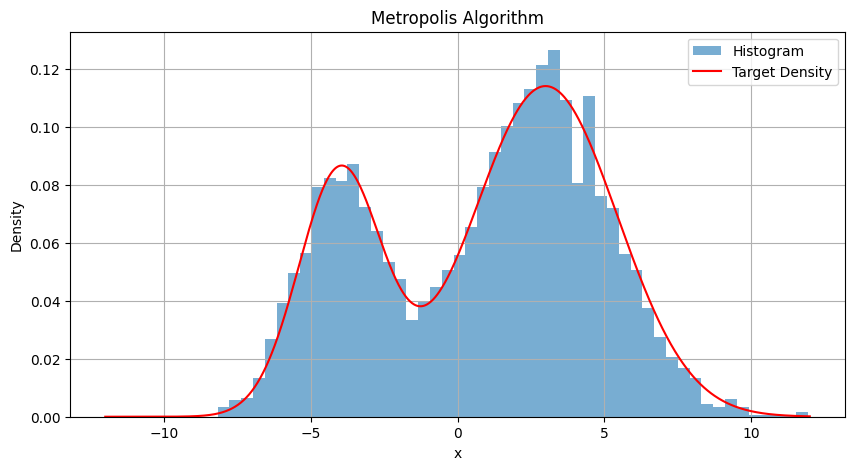

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def target_density(x):
    return 0.3 * norm.pdf(x, -4, np.sqrt(2)) + 0.7 * norm.pdf(x, 3, np.sqrt(6))

def metropolis_sampler(iterations, proposal_std):
    samples = []
    current = 0
    for _ in range(iterations):
        proposal = np.random.normal(current, proposal_std)
        alpha = min(1, target_density(proposal) / target_density(current))
        if np.random.rand() < alpha:
            current = proposal
        samples.append(current)
    return np.array(samples)

iterations = 10000
proposal_std = 3
samples = metropolis_sampler(iterations, proposal_std)

x = np.linspace(-12, 12, 1000)
y = 0.3 * norm.pdf(x, -4, np.sqrt(2)) + 0.7 * norm.pdf(x, 3, np.sqrt(6))

plt.figure(figsize=(10, 5))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Histogram')
plt.plot(x, y, 'r-', label='Target Density')
plt.legend()
plt.title('Metropolis Algorithm')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid()
plt.show()


### Задача 2
Рассмотрим граф $G=(V,E)$, вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример допустимой расстановки значений по вершинам графа показан на картинке ниже (черные вершины имеют значение 1, белые - 0):

<!-- ![img](http://www.mathematik.uni-ulm.de/stochastik/lehre/ss06/markov/skript_engl/bild4.jpg) -->

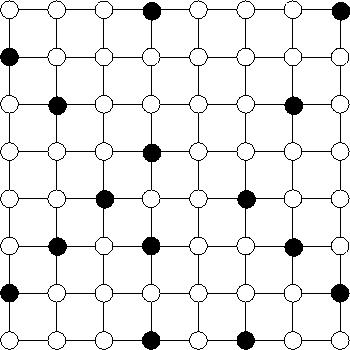

Как оценить, сколько в среднем закрашенных вершин будет иметь такой граф?

Сформулируем задачу в математических терминах.

Пусть $\xi \in \{0,1\}^{V}$ обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть $Z_G$ - общее количество допустимых конфигураций. Зададим  распределение на множестве всех $2^V$ конфигураций:
$$\begin{equation*}
\mu(\xi) =
 \begin{cases}
   \frac{1}{Z_G}, &\text{$\xi$ - допустимая конфигурация}\\
   0, &\text{иначе.}
 \end{cases}
\end{equation*}$$
Обозначим $n(\xi)$ - число закрашенных вершин в конфигурации $\xi$. Тогда
$$
{\rm E} n(\xi) = \sum\limits_{x \in \{0,1\}^V} n(x) \mu(x) = \frac{1}{Z_G} \sum\limits_{x \in \{0,1\}^V} n(x) {\rm I}_{\{x - \text{допустимая} \}}
$$

Явно перебирать все $x \in \{0,1\}^{V}$ не представляется возможным. Мы могли бы попробовать оценить ${\rm E} n(\xi)$, используя закон больших чиcел:
$$
{\rm E} n(\xi) \approx \frac{1}{N} \sum\limits_{i=1}^{N} n(\xi_i), \text{где $\xi_i$, $i=1,...,N$ - выборка случайных допустимых графов. }
$$

Для моделирования выборки можно применить метод MCMC:
1. выбираем случайную вершину
2. если в вершине можно заменить цвет - заменяем с вероятностью 0.5
3. добавляем граф в выборку
4. переходим на шаг 1

Задание
* Оценить  ${\rm E} n(\xi)$ для графа 10х10
* Построить график распределеиня $n(\xi)$

Совет: проверьте алгоритм на графах размера $2\times 2$. Ваш ответ должет быть близок к точному ответу (0+1+1+1+1+2+2)/7 = 8/7.

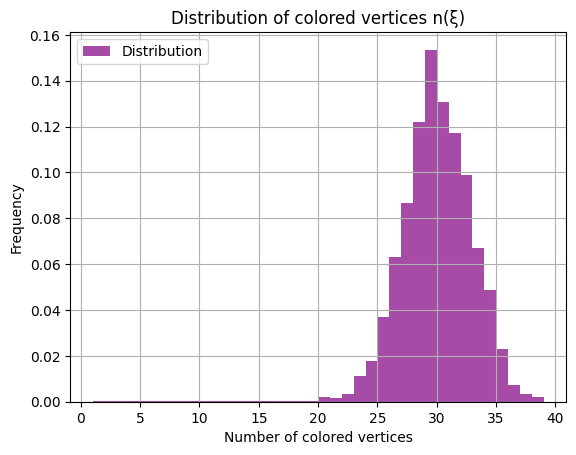

Оценка математического ожидания En(ξ): 29.5063


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

size = 10
iterations = 10000

graph = np.zeros((size, size), dtype=int)

def can_color(graph, x, y):
    neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
    for nx, ny in neighbors:
        if 0 <= nx < graph.shape[0] and 0 <= ny < graph.shape[1] and graph[nx, ny] == 1:
            return False
    return True

def mcmc_sampling(graph, iterations):
    n_colored = []
    for _ in range(iterations):
        x, y = np.random.randint(0, graph.shape[0]), np.random.randint(0, graph.shape[1])

        if can_color(graph, x, y):
            if graph[x, y] == 0:
                graph[x, y] = 1
            else:
                if np.random.rand() < 0.5:
                    graph[x, y] = 0

        n_colored.append(np.sum(graph))

    return n_colored

n_values = mcmc_sampling(graph, iterations)

plt.hist(n_values, bins=np.arange(min(n_values), max(n_values) + 1, 1), density=True, alpha=0.7, color='purple', label='Distribution')
plt.title("Distribution of colored vertices n(ξ)")
plt.xlabel("Number of colored vertices")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

expected_value = np.mean(n_values)
print(f"Оценка математического ожидания En(ξ): {expected_value}")
